### **Building Random Forest from scrach**

In [ ]:

import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [ ]:
x,y = make_classification(n_features= 5, n_redundant= 0 , n_informative= 5, n_clusters_per_class = 1)
data = pd.DataFrame(x, columns=['col1', 'col2', 'col3', 'col4', 'col5'] )
data['target'] = y
data.head()


,col1,col2,col3,col4,col5,target
0,0.080504,-1.924194,2.760063,1.470487,2.046249,1
1,-0.436238,1.580229,1.921731,-0.604618,-2.113131,1
2,-1.777733,-0.723010,0.979702,1.036666,-0.083631,1
3,-2.698123,0.327260,1.737436,1.191682,0.718747,1
4,-0.758931,1.426345,2.511397,-0.228442,-0.510575,1


In [ ]:
# function for row sampling
def row_sampling(data, percent):
    return data.sample(int(data.shape[0] * percent), replace=True )


# function for feature sampling

def sample_features(data, percent):
    cols = random.sample(data.columns.tolist()[:-1], int(percent*data.shape[1]))
    new_data = data[cols]
    new_data['target'] = data['target']
    return new_data


def combined_sampling(data, row_percent, col_percent):
    new_df = row_sampling(data, row_percent)
    return sample_features(new_df, col_percent)
    

In [ ]:
df1 = sample_features(data, 0.8)
df2 = sample_features(data, 0.8)
df3 = sample_features(data, 0.8)
df1.shape

C:\Users\Subham Pathak\AppData\Local\Temp\ipykernel_3308\3719799446.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['target'] = data['target']
C:\Users\Subham Pathak\AppData\Local\Temp\ipykernel_3308\3719799446.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['target'] = data['target']
C:\Users\Subham Pathak\AppData\Local\Temp\ipykernel_3308\3719799446.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

(100, 5)

In [ ]:
cl1 = DecisionTreeClassifier()
cl2 = DecisionTreeClassifier()
cl3 = DecisionTreeClassifier()

cl1.fit(df1.iloc[:,:4], df1.iloc[:,-1])
cl2.fit(df2.iloc[:,:4], df2.iloc[:,-1])
cl3.fit(df3.iloc[:,:4], df3.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.5, 0.9, 'x[1] <= -0.068\ngini = 0.5\nsamples = 100\nvalue = [51, 49]'),
 Text(0.2222222222222222, 0.7, 'x[0] <= -0.747\ngini = 0.13\nsamples = 43\nvalue = [3, 40]'),
 Text(0.3611111111111111, 0.8, 'True  '),
 Text(0.1111111111111111, 0.5, 'x[1] <= -1.672\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.05555555555555555, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.16666666666666666, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.3333333333333333, 0.5, 'x[0] <= 2.231\ngini = 0.051\nsamples = 38\nvalue = [1, 37]'),
 Text(0.2777777777777778, 0.3, 'gini = 0.0\nsamples = 29\nvalue = [0, 29]'),
 Text(0.3888888888888889, 0.3, 'x[0] <= 2.239\ngini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4444444444444444, 0.1, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.7777777777777778, 0.7, 'x[3] <= 1.52\ngini = 0.266\nsamples = 57\nvalue = [48, 9]'),
 Text(0.6388888888888888, 0.8, '  

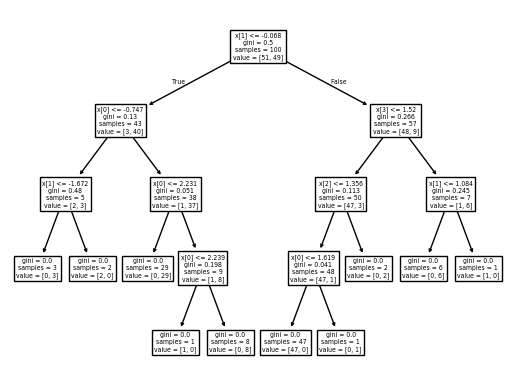

In [ ]:
plot_tree(cl1)

[Text(0.5, 0.9, 'x[1] <= -0.068\ngini = 0.5\nsamples = 100\nvalue = [51, 49]'),
 Text(0.2222222222222222, 0.7, 'x[0] <= -0.747\ngini = 0.13\nsamples = 43\nvalue = [3, 40]'),
 Text(0.3611111111111111, 0.8, 'True  '),
 Text(0.1111111111111111, 0.5, 'x[1] <= -1.672\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.05555555555555555, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.16666666666666666, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.3333333333333333, 0.5, 'x[0] <= 2.231\ngini = 0.051\nsamples = 38\nvalue = [1, 37]'),
 Text(0.2777777777777778, 0.3, 'gini = 0.0\nsamples = 29\nvalue = [0, 29]'),
 Text(0.3888888888888889, 0.3, 'x[0] <= 2.239\ngini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4444444444444444, 0.1, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.7777777777777778, 0.7, 'x[3] <= 1.52\ngini = 0.266\nsamples = 57\nvalue = [48, 9]'),
 Text(0.6388888888888888, 0.8, '  

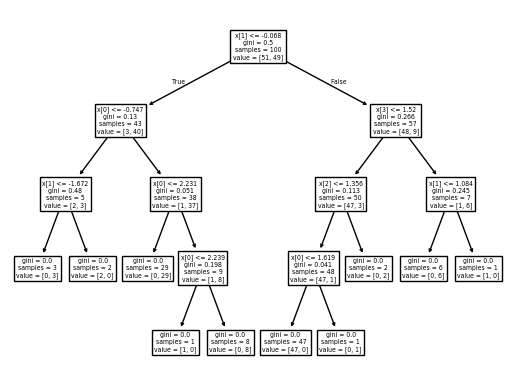

In [ ]:
plot_tree(cl1)

[Text(0.5, 0.9, 'x[0] <= -0.068\ngini = 0.5\nsamples = 100\nvalue = [51, 49]'),
 Text(0.3076923076923077, 0.7, 'x[1] <= 2.741\ngini = 0.13\nsamples = 43\nvalue = [3, 40]'),
 Text(0.40384615384615385, 0.8, 'True  '),
 Text(0.23076923076923078, 0.5, 'x[3] <= 0.274\ngini = 0.048\nsamples = 41\nvalue = [1, 40]'),
 Text(0.15384615384615385, 0.3, 'x[3] <= 0.062\ngini = 0.165\nsamples = 11\nvalue = [1, 10]'),
 Text(0.07692307692307693, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.23076923076923078, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3076923076923077, 0.3, 'gini = 0.0\nsamples = 30\nvalue = [0, 30]'),
 Text(0.38461538461538464, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6923076923076923, 0.7, 'x[1] <= -1.22\ngini = 0.266\nsamples = 57\nvalue = [48, 9]'),
 Text(0.5961538461538461, 0.8, '  False'),
 Text(0.5384615384615384, 0.5, 'x[0] <= 1.819\ngini = 0.346\nsamples = 9\nvalue = [2, 7]'),
 Text(0.46153846153846156, 0.3, 'gini = 0.0\nsamples = 7\n

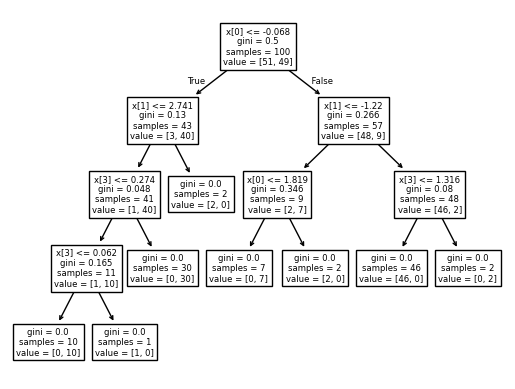

In [ ]:
plot_tree(cl3)

### **Hyperparameter Tuning of Random Forest**

In [ ]:
data = pd.read_csv(r"C:\Users\Subham Pathak\Desktop\AI\ML\DATA_SETS\heart.csv")
data.head(10)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data.shape

(303, 14)

In [ ]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]
print(x)
print(y)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal
0     63    1   3       145   233    1        0      150      0      2.3      0   0     1
1     37    1   2       130   250    0        1      187      0      3.5      0   0     2
2     41    0   1       130   204    0        0      172      0      1.4      2   0     2
3     56    1   1       120   236    0        1      178      0      0.8      2   0     2
4     57    0   0       120   354    0        1      163      1      0.6      2   0     2
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...    ...  ..   ...
298   57    0   0       140   241    0        1      123      1      0.2      1   0     3
299   45    1   3       110   264    0        1      132      0      1.2      1   0     3
300   68    1   0       144   193    1        1      141      0      3.4      1   2     3
301   57    1   0       130   131    0        1      115      1      1.2      1   1     3
302   57  

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)

In [ ]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
xtest_prediction = model.predict(x_test)
xtest_accuracy = accuracy_score(y_test, xtest_prediction)
print(xtest_accuracy*100)


83.60655737704919


In [ ]:
using_cross_val = np.mean(cross_val_score(RandomForestClassifier(),x, y, cv = 10))
print(using_cross_val*100)

83.17204301075269
